# Content
- Importing Libraries
- Reading Data
- Understanding  Data
- Visualization of Data
- Data Preprocessing
- Training and Spliting Data
- Evaluations Metrics
- Standardize Data Points
- HYPERPARAMETER
- Model Evaluation
- Conclusion 

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [67]:
df = pd.read_csv('insurance_dataset.csv')

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# UNDERSTANDING OUR DATA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# We Visualize our data for a better understanding

<Figure size 500x500 with 0 Axes>

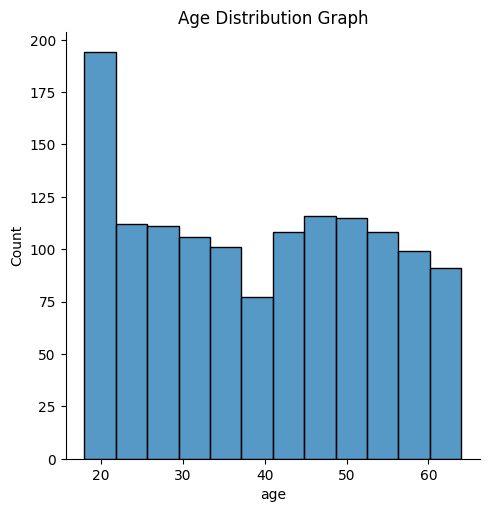

In [18]:
plt.figure(figsize=(5,5))
sns.displot(df['age'])
plt.title('Age Distribution Graph')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

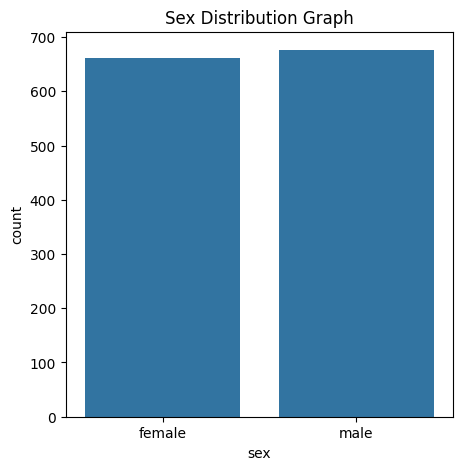

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x='sex')
plt.title('Sex Distribution Graph')
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 500x500 with 0 Axes>

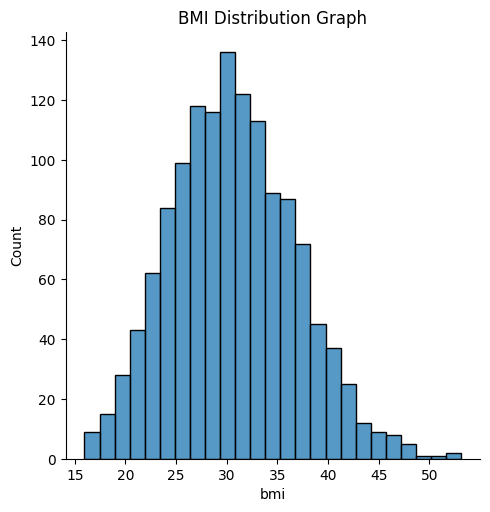

In [20]:
plt.figure(figsize=(5,5))
sns.displot(df['bmi'])
plt.title('BMI Distribution Graph')
plt.show  

BMI is a useful tool for assessing weight status and potential health risk:
Categories of BMI:
Below 18.5===> Underweight
Range 18.5 - 24.5===> Normal Weight
Beyond 24.5 - 29.9===> Overweight
Beyond 29.9-30==> Obese

<Figure size 500x500 with 0 Axes>

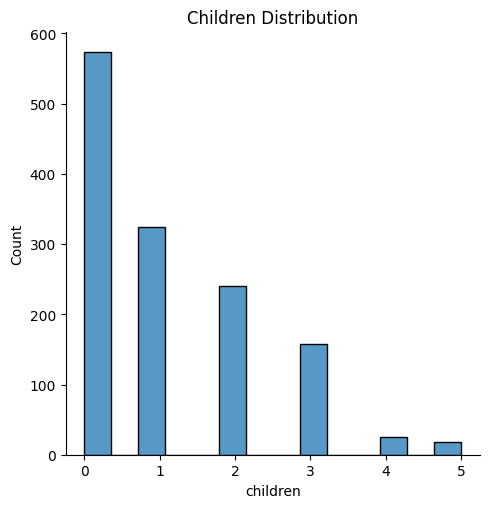

In [21]:
plt.figure(figsize=(5,5))
sns.displot(df['children'])
plt.title("Children Distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

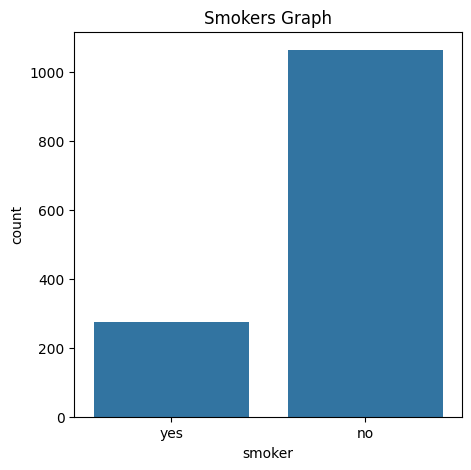

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smokers Graph')
plt.show   

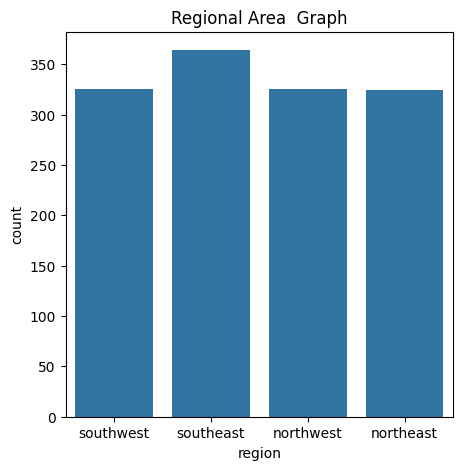

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title("Regional Area  Graph")
plt.show()

<Figure size 500x500 with 0 Axes>

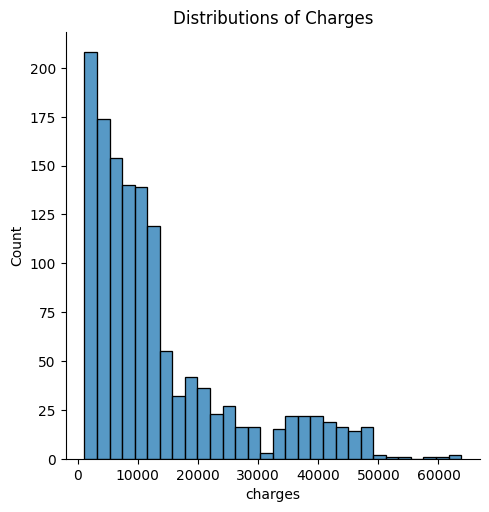

In [24]:
plt.figure(figsize=(5,5))
sns.displot(data=df, x='charges')
plt.title("Distributions of Charges")
plt.show()

# Data Processing

We Encode Our Categorical Value by Using OneHotEncoder <br>
This is turning our categorical columns like "sex", "smoker" "Region" to a numerical column for our model to understand

In [31]:
ohe =  OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')

In [32]:
ohetrans = ohe.fit_transform(df[['sex', 'smoker', 'region']])

In [33]:
ohetrans

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
new_df = pd.concat([df, ohetrans], axis=1).drop(columns=(['sex', 'smoker', 'region']))

In [35]:
new_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   float64
 5   sex_male          1338 non-null   float64
 6   smoker_no         1338 non-null   float64
 7   smoker_yes        1338 non-null   float64
 8   region_northeast  1338 non-null   float64
 9   region_northwest  1338 non-null   float64
 10  region_southeast  1338 non-null   float64
 11  region_southwest  1338 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 125.6 KB


# Spliting and Training our Data

Now we split our dataset for training and testing using sklearn library 

In [37]:

X = new_df[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = new_df['charges']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Next

# Evaluation Metrics

NOW WE APPLY OUR METRICS TO IMPROVE OUR MODEL AND TRAIN OUR MODEL TO MAKE ACCURATE PREDICTIONS

## <a name="Normalization"> Normalize Features (Z-score)<a>
Makes training stable (all features are scaled).
<br> Speeds up gradient descent.
<br><br>
Using the normalization formular <br>
Where: 
$$ \frac{Mean}{Standard Deviation} $$

**Implementation**

In [51]:
def normalize_features (X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

We normalize the training and test data
Makes training stable (all features are scaled).

In [52]:
X_train_norm, mean, std = normalize_features(X_train)
X_test_norm = (X_test - mean) / std

Using weight + bias to make prediction in all data points in X

In [53]:
def predict(X, w, b):
    p = np.dot(X,w)+b
    return p 

Next

## <a name='R2'> We Check how Accurate our Model is by using the R² Score Metrics<a>
<br>
WHEREAS: R² Score= <br>
$$ R^2 = 1 - \frac{RSS}{TSS} \tag{1}$$ <br>
$$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} \tag{2}$$
Where: <br>
$ \hat{y} $= predicted value <br>
$ y_i $ = actual value <br>
$ \bar{y} $ = mean of the actual value <br> <br>


In [54]:
def r2_score_metrics(y_true, y_pred):
    RSS = np.sum((y_true - y_pred) ** 2)
    TSS = np.sum((y_true - np.mean(y)) ** 2 )
    r2 = 1- (RSS/TSS)
    return r2

## <a> COMPUTE THE COST AND THE GRADIENT DESCENT FOR THE MODEL WITH MULTIPLE VARIABLES<a>
<br>
This cost function calculate far our prediction is from the actual values. And the cost function that will be used is the MSE (Mean Squared Error).
So  we are to match how well our prediction is from the actual value. <br>
And this Cost Function is minimized using Gradient Descent. <br>
Lower Cost Means better performance. <br>
Where Cost Function: <br>
$$ J(\mathbf{w},b) = \frac{1}{2m} \sum_{i=1}^{m} \left(f_{\mathbf{w}},b(x^{(i)}) - y^{(i)}\right)^2 $$ <br>
Where: <br>
m = number of training dataset <br>
$f_{\mathbf{w}},b(x^{(i)})$ = $ X^{(i)} . w $ <br>
w = weights <br>
y = target/output <br>
<br>


In [55]:
def compute_cost(X, y, w,b):
    m = X.shape[0]
    y_pred = predict (X,w,b)
    cost = (1/ (2 * m)) * np.sum((y_pred - y)**2)
    return cost

In [56]:
w_init = np.array([0.5, 1., 1, 1.5, 1.0 ,1,0,0,0.5,0,0.4])
b_init = 5
print("The Cost of our model is {}".format(compute_cost(X_train, y_train, w_init, b_init)))

The Cost of our model is 161711128.66805124


Now We implement Gradient Descent
To minimize the Cost Function as you can see the cost function is very big, which means our model is not prediciting well

<a> GRADIENT DESCENT <a> <br> <br>
We will be minimizing cost function using gradient descent to find the best w and b: 
$$ \hat{y}^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_n x_n^{(i)} + b $$ <br> 
$$ w_j := w_j - \alpha \cdot \frac{\partial J(w, b)}{\partial w_j} \tag{2} $$ 

$$ b := b - \alpha \cdot \frac{\partial J(w, b)}{\partial b}$$ <br>

Where: <br>

$$ \frac{\partial J(w, b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \tag{3}$$

$$\frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)$$



In [60]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_pred = np.dot(X,w)+b
    error = y_pred - y
    dw = (1/m) * X.T.dot(error)
    db = (1/m) * np.sum(error)
    return dw, db

This helps us to adjust w and b to reduce cost

In [61]:
def gradient_descent(X, y, w,b, alpha, iterations):
    cost_history = []

    for i in range(iterations):
        dw, db = compute_gradient(X, y, w,b)
        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(X,y,w,b)
        cost_history.append(cost)
        
        if i % 100==0:
            print(f"iterations===> {i}: Cost===> {cost}")
    return w, b, cost_history
        

# Standardize Our Data Points <br> 
using Standard Scaler from Sklearn

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(" Standard Deviation and Mean of our data is:\n", X_train_scaled)

 Standard Deviation and Mean of our data is:
 [[ 1.54446486  1.02597835 -1.02597835 ...  1.75708174 -0.59380229
  -0.55760593]
 [ 0.48187425 -0.97467943  0.97467943 ... -0.56912549 -0.59380229
   1.79338122]
 [ 1.04858924  1.02597835 -1.02597835 ... -0.56912549  1.68406222
  -0.55760593]
 ...
 [ 1.33194673 -0.97467943  0.97467943 ... -0.56912549 -0.59380229
  -0.55760593]
 [-0.15568012  1.02597835 -1.02597835 ... -0.56912549 -0.59380229
   1.79338122]
 [ 1.11942861 -0.97467943  0.97467943 ... -0.56912549 -0.59380229
   1.79338122]]


  ## HYPERPARAMETER 

Now we initialize some parameters

In [63]:
w_init = np.zeros(X_train_scaled.shape[1])
b_init = 0
alpha = 0.01
iterations = 10000

w_final, b_final, cost_history = gradient_descent(X_train_scaled, y_train, w_init, b_init, alpha, iterations)
y_pred_test = X_test_scaled.dot(w_final) + b_final
print(f"predictions===> {y_pred_test}, target value===>{y_train}")

print(f"b,w found by gradient descent: {b_final},{w_final}")

iterations===> 0: Cost===> 158997658.9472522
iterations===> 100: Cost===> 32685065.89618424
iterations===> 200: Cost===> 20622048.849517956
iterations===> 300: Cost===> 19098223.116923388
iterations===> 400: Cost===> 18896411.385478918
iterations===> 500: Cost===> 18869450.7124768
iterations===> 600: Cost===> 18865836.599931218
iterations===> 700: Cost===> 18865350.695721623
iterations===> 800: Cost===> 18865285.14641439
iterations===> 900: Cost===> 18865276.26541084
iterations===> 1000: Cost===> 18865275.055073272
iterations===> 1100: Cost===> 18865274.88874997
iterations===> 1200: Cost===> 18865274.865619726
iterations===> 1300: Cost===> 18865274.862347424
iterations===> 1400: Cost===> 18865274.86187316
iterations===> 1500: Cost===> 18865274.861802127
iterations===> 1600: Cost===> 18865274.861791037
iterations===> 1700: Cost===> 18865274.861789215
iterations===> 1800: Cost===> 18865274.8617889
iterations===> 1900: Cost===> 18865274.861788843
iterations===> 2000: Cost===> 18865274.861

We visualize our Gradient Descent

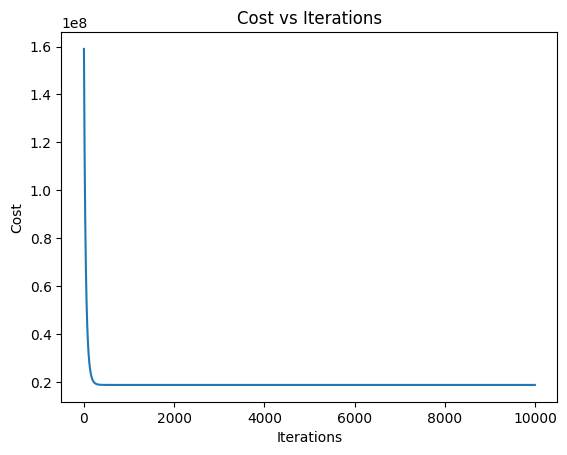

In [64]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

This graph shows that the cost function is decreasing well, it shows that from the 500 or likely 1000 iterations that is were it was stable <br>
This appears to be good, as the cost stabilizes  at a low value after the initial drop

# Model Evaluations

Let check model Coefficient Determination and the Cost 

In [40]:
# Compute Cost
cost_train = compute_cost(X_train_scaled, y_train, w_final, b_final)
cost_test = compute_cost(X_test_scaled, y_test, w_final, b_final)
# Compute R2 Score
r2_train = r2_score_metrics(y_train, predict(X_train_scaled, w_final, b_final))
r2_test =r2_score_metrics(y_test, predict(X_test_scaled, w_final, b_final))

In [45]:
print("The Training Cost:", round(cost_train, 2))
print( "The Testing Cost:", round(cost_train, 2))
print("The coefficient determination of our Training is {}%".format(round(r2_train, 4) * 100))
print("The coefficient determination of our Testing is {}%".format(round(r2_test, 4) * 100))

The Training Cost: 18865274.86
The Testing Cost: 18865274.86
The coefficient determination of our Training is 74.24%
The coefficient determination of our Testing is 76.97%


# Conclusion 
Our Training and Testing Cost is ==> 18865274.86 <br>
This is the Average Squared Error that this model maks on the training and testing dataset .
This number is reasonable considering our target value is very high . <br>
We can use the RMSE Metric Evaluation to reduce our cost . <br> <br> 
Training $R^2 Score = 74.2% $ <br>
This means our model 74.2% explain the variance in our medical cost on the training data. <br>
This is good shows that our model fit the data well without Overfitting . <br> <br>
Testing $R^2 Score = 76.2% $ <br>
This is even better than our training data .<br>
This also means our model can predict well with unseen data . <br>
It can predict real world data nearly 77% accurately, which is a strong starting point for this linear regression model

In [49]:
# We can further reduce our cost like this
cost = 18865274.86
rmse = np.sqrt(cost)
print("The Average Mean Squared Error of our model is {:.1f}%:".format(round(rmse)))

The Average Mean Squared Error of our model is 4343.0%:


This is even much better than our formal cost

I know this is not in his best but this is my first project without any tutorials videos. <br>
Just me and researching and reading 📖 and following how Cousera Taught me on my Linear Regression Class with Andrew Ng.
If you have anyway this can be improved on you can help i would love to learn. <br>
# THANK YOU